# Handwritten Digit Recognition using MNIST

Objective:  
Build a neural network that classifies handwritten digits (0–9) using the MNIST dataset.

Tools Used:
- Python  
- TensorFlow / Keras  
- NumPy  
- Matplotlib


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


In [13]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize image pixel values (0–255 → 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode labels (0–9)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


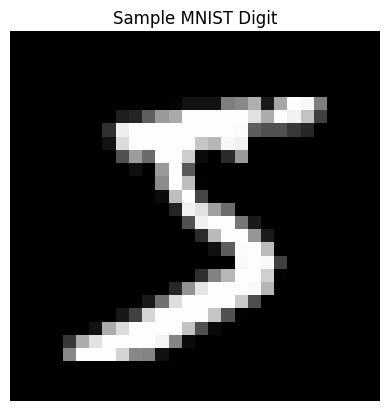

In [14]:
plt.imshow(X_train[0], cmap='gray')
plt.title("Sample MNIST Digit")
plt.axis('off')
plt.show()


## Model Architecture
- Input: 28×28 grayscale image
- Flatten layer to convert image to vector
- Dense hidden layer with ReLU activation
- Output layer with Softmax activation (10 classes)


In [15]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


In [16]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [17]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.1
)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8716 - loss: 0.4534 - val_accuracy: 0.9635 - val_loss: 0.1246
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9607 - loss: 0.1323 - val_accuracy: 0.9712 - val_loss: 0.0962
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9767 - loss: 0.0809 - val_accuracy: 0.9765 - val_loss: 0.0806
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9818 - loss: 0.0611 - val_accuracy: 0.9753 - val_loss: 0.0846
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9848 - loss: 0.0471 - val_accuracy: 0.9770 - val_loss: 0.0763


In [18]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", round(test_accuracy * 100, 2), "%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9750 - loss: 0.0904
Test Accuracy: 97.79 %


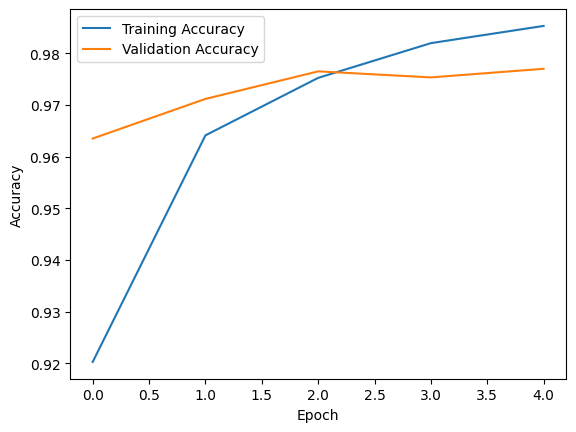

In [19]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


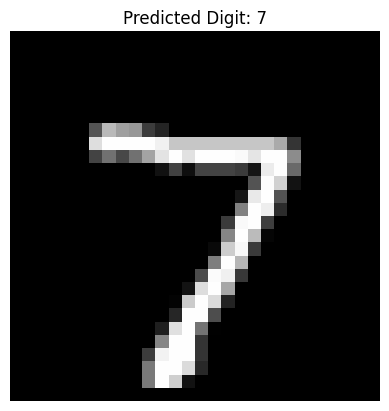

In [20]:
prediction = model.predict(X_test[0].reshape(1, 28, 28))
predicted_digit = np.argmax(prediction)

plt.imshow(X_test[0], cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis('off')
plt.show()


## Conclusion

A neural network was successfully trained to classify handwritten digits using
the MNIST dataset. After preprocessing and training, the model achieved a test
accuracy of **97.66%**, demonstrating strong generalization on unseen data.

This project showcases core machine learning concepts including data
normalization, neural network design, training, and evaluation.
